Pronóstico con regresión
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/series-de-tiempo/blob/master/07-R-regresion.ipynb) para acceder a la última versión online

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/series-de-tiempo/blob/master/07-R-regresion.ipynb) para ver la última versión online en `nbviewer`. 

---

# Modelo de tendencia lineal

### Generación de series sintéticas

**Ejercicio.--** Grafique una realización del modelo $y_t = 10 + 0.7*t + e_t$ con $T$ = 100 y $e_t$ ~ $N(0, 0.1^2)$.

### Pronóstico

**Ejercicio.--** Si la serie del ejercicio anterior es la serie real, grafique el pronóstico para las siguientes 20 observaciones y los intervalos de confianza para una desviación estándar.

### Estimación

El modelo matemático de tendencia lineal se define como:

$$y_t = \beta_0 + \beta_1 * t + e_t$$

con:


* $\beta_0$ ~ $N(0, \sigma_0^2)$ 


* $\beta_1$ ~ $N(\mu_1, \sigma_1^2)$ 


* $e_t$ ~ $N(0, \sigma_e^2)$


Y se estima por mínimos cuadrados ordinarios (¿recuerda la formulación matemática?).

> [`lm {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/lm.html)

In [1]:
## Datos
y <- c( 51.74, 48.92, 52.12, 51.90,
        50.88, 52.52, 52.50, 55.05,
        56.73, 55.05, 56.85, 55.29,
        55.70, 56.72, 56.56, 57.85,
        58.67, 59.59, 57.61, 60.15,
        60.97, 61.47, 61.94, 63.00,
        60.80, 62.67, 66.14, 64.40,
        64.04, 64.15, 65.41, 65.47,
        66.25, 67.86, 65.97, 67.52,
        69.25, 67.81, 69.53, 71.16,
        71.13, 70.24, 71.51, 71.32,
        71.34, 72.52, 73.14, 73.33,
        75.21, 74.07 )


y <- ts(y,frequency = 4,start = c(2005,1)) # objeto time-series, variable dependiente
t <- seq(1:length(y))                      # variable independiente t: tiempo
m <- lm(formula = y ~ t)                             # ajuste del modelo
m


Call:
lm(formula = y ~ t)

Coefficients:
(Intercept)            t  
    50.0321       0.4944  


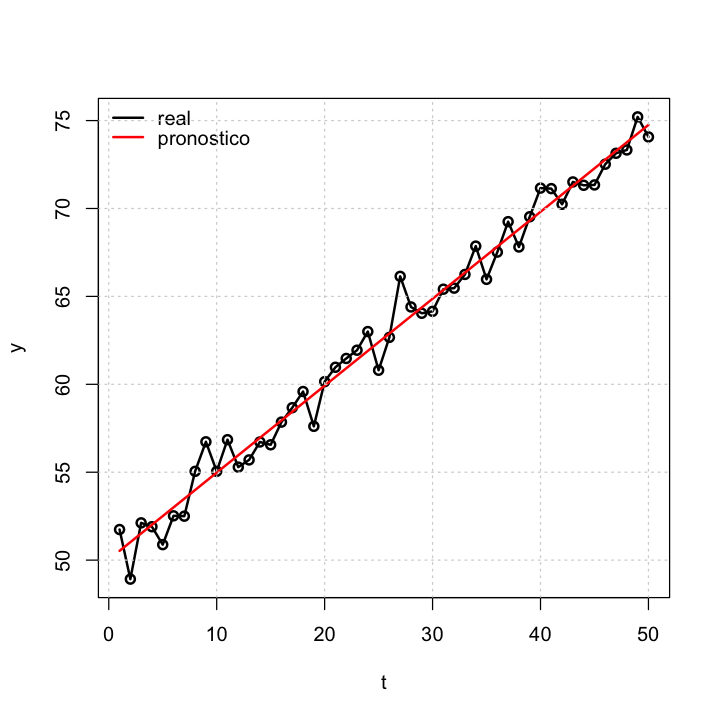

In [2]:
options(repr.plot.width=6, repr.plot.height=6)
plot(t, y, type = "o", lwd = 2)
lines(m$fitted.values, col = "red", lwd = 2)
legend( "topleft",                              # posicion
        c("real","pronostico"),                 # texto
        lwd = c(2, 2),                          # grosor lineas
        col = c('black','red'),                 # color lineas
        bty = "n")                              # sin caja alrededor de la leyenda
grid()

### Diagnóstico

In [3]:
summary(m)


Call:
lm(formula = y ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1010 -0.6462 -0.1043  0.5935  2.7579 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.032122   0.286653  174.54   <2e-16 ***
t            0.494442   0.009783   50.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9983 on 48 degrees of freedom
Multiple R-squared:  0.9816,	Adjusted R-squared:  0.9812 
F-statistic:  2554 on 1 and 48 DF,  p-value: < 2.2e-16


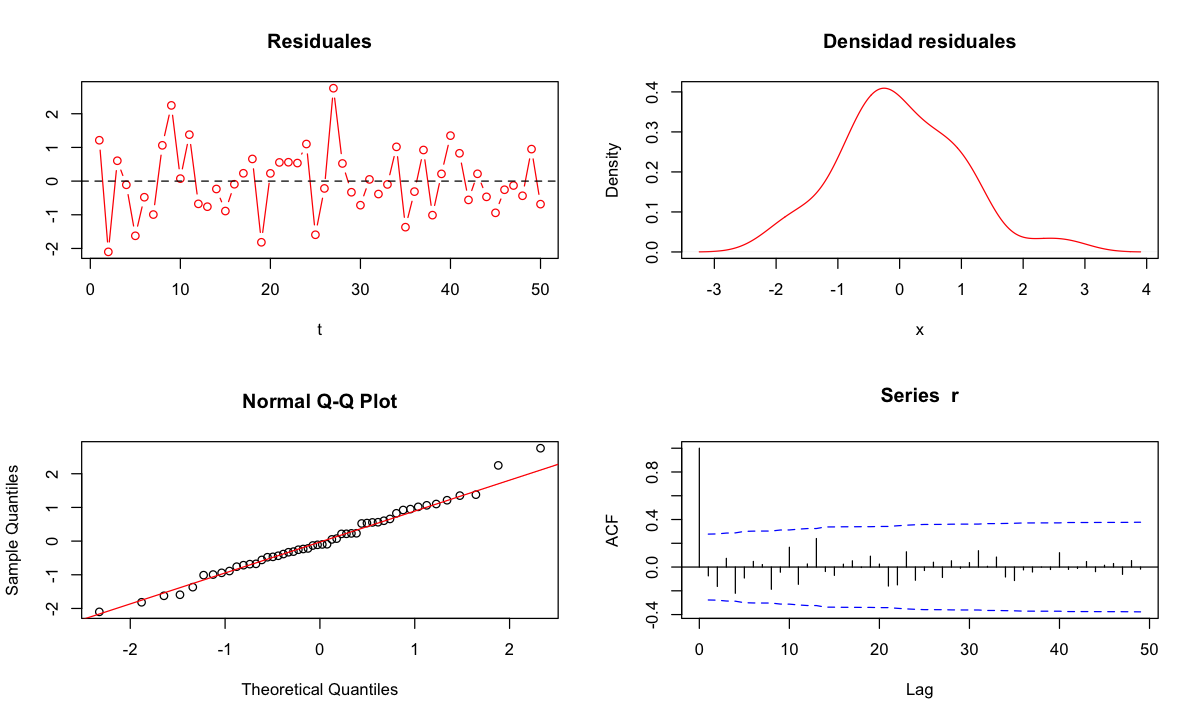

In [4]:
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=6)
r = m$residuals
plot(t, r, type='b', ylab='', main="Residuales", col="red")
abline(h=0,lty=2)               
plot(density(r), xlab='x', main= 'Densidad residuales', col="red")
qqnorm(r)               
qqline(r, col=2)         
acf(r, ci.type="ma", 60) 

**Ejercicio.--** Pronostique los siguientes 20 valores de la serie y grafique los intervalos de confianza.

# Modelo de tendencia cuadrática

### Generación de series sintéticas

**Ejercicio.--** Grafique una realización del modelo $y_t = 10 + 0.8*t + 0.05 * t^2 + e_t$ con $T$ = 100 y $e_t$ ~ $N(0, 0.1^2)$.

### Pronóstico

**Ejercicio.--** Si la serie del ejercicio anterior es la serie real, grafique el pronóstico para las siguientes 20 observaciones y los intervalos de confianza para una desviación estándar.

### Estimación

El modelo de regresión multiple para estimar la tendencia cuadrática de una serie es:

$$ y_t = \beta_0 + \beta_1 {t} + \beta_2 {t}^2 + e_t $$

In [5]:
## Datos de la serie
y <- ts(c(  23.47,  25.32,  19.66,  26.91,
            19.08,  22.88,  35.49,  23.33,
            25.26,  27.22,  32.99,  36.45,
            35.20,  39.99,  45.94,  47.29,
            47.34,  46.39,  50.79,  53.07,
            55.61,  59.22,  65.38,  63.58,
            69.53,  78.23,  78.52,  82.44,
            90.66,  82.86,  93.54,  94.05,
           101.24,  97.06, 119.74, 119.75,
           118.28, 116.69, 126.91, 132.68,
           137.10, 151.43, 151.47, 146.06,
           154.55, 156.77, 164.12, 176.14,
           171.41, 192.87),
        frequency = 4,start = c(2005,1))

t  <- seq(1:length(y))   # tiempo
tt <- t*t                # tiempo^2
m  <- lm(y ~ t + tt)     # estimación del modelo
m 


Call:
lm(formula = y ~ t + tt)

Coefficients:
(Intercept)            t           tt  
   18.84084      0.79412      0.05073  


### Diagnóstico

In [6]:
summary(m)


Call:
lm(formula = y ~ t + tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1358 -3.0718  0.0167  2.6452 10.9656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.84084    2.02956   9.283 3.34e-12 ***
t            0.79412    0.18359   4.326 7.87e-05 ***
tt           0.05073    0.00349  14.535  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.594 on 47 degrees of freedom
Multiple R-squared:  0.992,	Adjusted R-squared:  0.9917 
F-statistic:  2926 on 2 and 47 DF,  p-value: < 2.2e-16


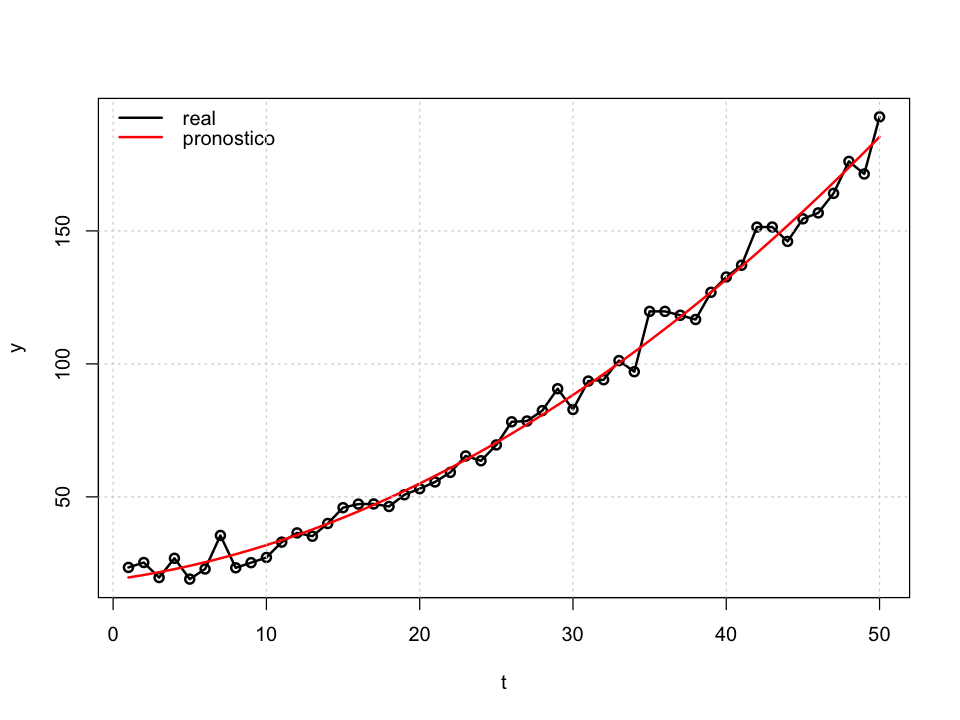

In [7]:
options(repr.plot.width=8, repr.plot.height=6)
plot(t, y, type="o", lwd=2)
lines(m$fitted.values, col = "red", lwd = 2)
legend( "topleft", c("real","pronostico"),
        lwd = c(2, 2), col = c('black','red'), 
        bty = "n") 
grid()

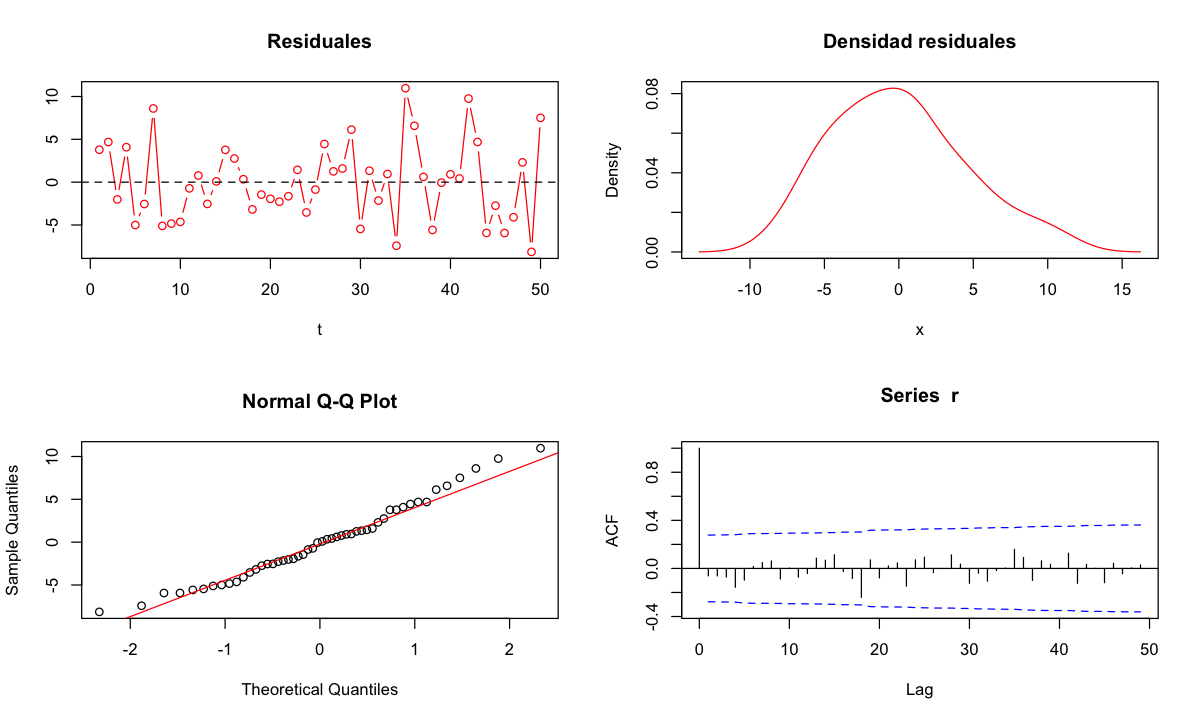

In [8]:
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=6)
r = m$residuals
plot(t, r, type='b', ylab='', main="Residuales", col="red")
abline(h=0,lty=2)               
plot(density(r), xlab='x', main= 'Densidad residuales', col="red")
qqnorm(r)               
qqline(r, col=2)         
acf(r, ci.type="ma", 60) 

**Ejercicio.--** Pronostique los siguientes 20 valores de la serie y grafique los intervalos de confianza.

**Ejercicio.--**. Realice un modelo lineal , un modelo cuadrático y un modelo cúbico para ajustar la tendencia de la siguiente serie. 

* Haga el diagnóstico completo de cada modelo.

* ¿Cuál es el mejor?

# Modelo componente de tendencia y estacionalidad.

### Generación de series sintéticas

**Ejercicio.--** Grafique una realización del modelo 
$y_t = 10 + 0.8*t + 0.05 * t^2 + 1.5 * I_{1, t} + 1.0 * I_{2, t} + 0.3 * I_{3, t} + e_t$ 
con:


* $T$ = 40 


* $e_t$ ~ $N(0, 0.1^2)$.


* $I_{1, t}$ = 1, 0, 0, 0, 1, 0, 0, 0, 1, 0...


* $I_{2, t}$ = 0, 1, 0, 0, 0, 1, 0, 0, 0, 1...


* $I_{3, t}$ = 0, 0, 1, 0, 0, 0, 1, 0, 0, 0...

### Pronóstico

**Ejercicio.--** Si la serie del ejercicio anterior es la serie real, grafique el pronóstico para las siguientes 20 observaciones y los intervalos de confianza para una desviación estándar.

### Estimación

El siguiente modelo matemático es estimado por mínimos cuadrados ordinarios, al igual que en los casos anteriores:

$$y_t =  \beta_0 + \sum_{j=1}^{k} \beta_j * t^j + \sum_{j=1}^{s-1} \delta_j * I_t + e_t $$

Como paso adicional se deben generar las variables indicadoras $I_{s, t}$ con $S=1, ..., S-1$ donde $S$ es el período de la componente cíclica del modelo. Para ello, se utiliza la función `seasonaldummy` de la librería `forecast`.

> [`seasonaldummy {forecast}`](https://cran.r-project.org/web/packages/forecast/forecast.pdf)


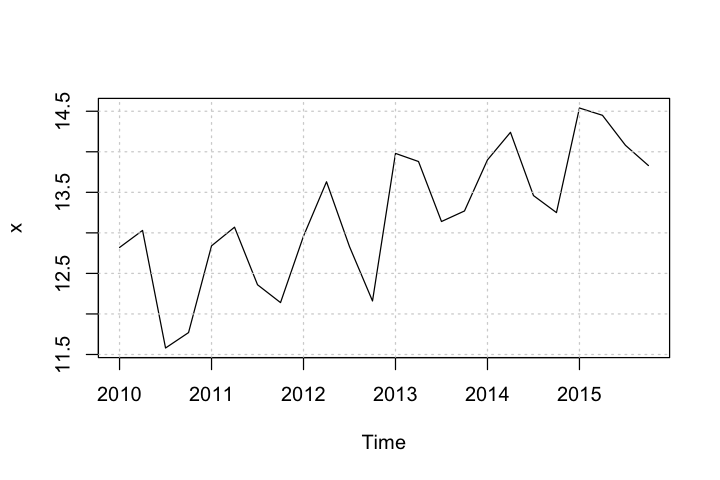

In [9]:
## Datos de la serie
x <- ts(data = c( 12.82, 13.03, 11.58, 11.77, 
                  12.84, 13.07, 12.36, 12.14,
                  12.96, 13.63, 12.83, 12.16,
                  13.98, 13.88, 13.14, 13.27,
                  13.90, 14.24, 13.46, 13.25,
                  14.54, 14.45, 14.08, 13.83),
       freq = 4,
       start = c(2010,01))
options(repr.plot.width=6, repr.plot.height=4)
plot(x)
grid()

In [10]:
# Particion de los datos

T <- length(x) 
t <- seq(1:(T-4))

x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))

x.fit
x.for

      Qtr1  Qtr2  Qtr3  Qtr4
2010 12.82 13.03 11.58 11.77
2011 12.84 13.07 12.36 12.14
2012 12.96 13.63 12.83 12.16
2013 13.98 13.88 13.14 13.27
2014 13.90 14.24 13.46 13.25

      Qtr1  Qtr2  Qtr3  Qtr4
2015 14.54 14.45 14.08 13.83

In [11]:
library(forecast)
It <- seasonaldummy(x.fit)
It

Q1,Q2,Q3
1,0,0
0,1,0
0,0,1
0,0,0
1,0,0
0,1,0
0,0,1
0,0,0
1,0,0
0,1,0


In [12]:
m <- lm(x.fit ~ t + It)                                
m


Call:
lm(formula = x.fit ~ t + It)

Coefficients:
(Intercept)            t         ItQ1         ItQ2         ItQ3  
   11.38100      0.09475      1.06625      1.24150      0.25075  


### Diagnóstico

In [13]:
summary(m)


Call:
lm(formula = x.fit ~ t + It)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35800 -0.09625  0.00550  0.10425  0.37300 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.381000   0.151601  75.072  < 2e-16 ***
t            0.094750   0.009192  10.308 3.35e-08 ***
ItQ1         1.066250   0.149638   7.126 3.47e-06 ***
ItQ2         1.241500   0.148219   8.376 4.87e-07 ***
ItQ3         0.250750   0.147362   1.702    0.109    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2325 on 15 degrees of freedom
Multiple R-squared:  0.9214,	Adjusted R-squared:  0.9004 
F-statistic: 43.96 on 4 and 15 DF,  p-value: 4.112e-08


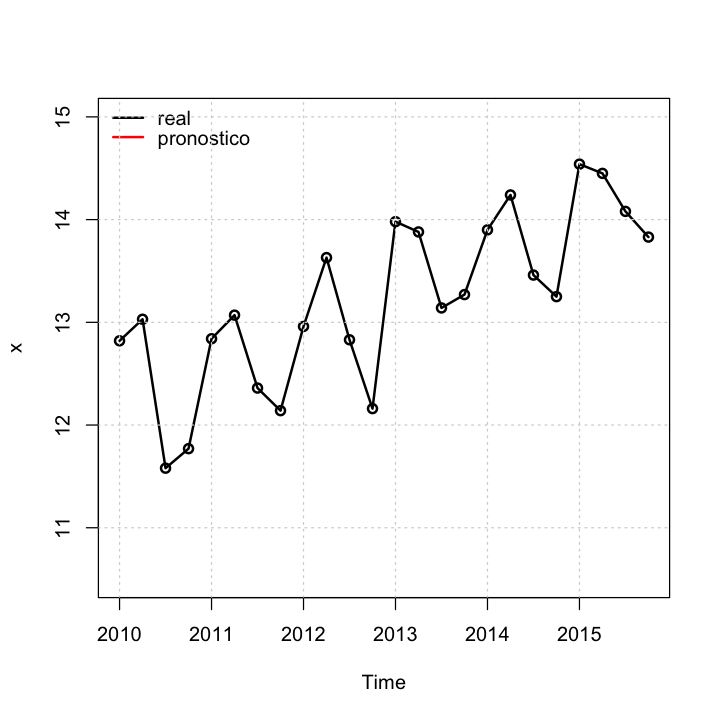

In [14]:
## corrija el siguiente codigo
options(repr.plot.width=6, repr.plot.height=6)
plot(x, type='o', lwd=2, ylim=c(10.5,15))
lines(m$fitted.values,col='red',lwd=2)
legend( "topleft", c("real","pronostico"), 
        lwd = c(2, 2), col = c('black','red'), 
        bty = "n")
grid()

### Pronóstico

> [`predict.lm {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)

> [`seasonaldummyf {forecast}`](https://cran.r-project.org/web/packages/forecast/forecast.pdf)

In [15]:
T      <- length(x.fit)                          # Longitud del periodo de ajuste
P      <- 4                                      # Periodos a pronosticar
Itf    <- seasonaldummy(x.fit, P)                # Variables indicadoras del pronostico
tf     <- seq(T+1,T+P,1)                         # Tiempo 
y.pred <- predict(m,data.frame(t=tf, It=I(Itf))) # Predicción
y.pred <- ts(y.pred, freq=4, start=c(2015,1))

In [16]:
y.pred

       Qtr1   Qtr2   Qtr3   Qtr4
2015 14.437 14.707 13.811 13.655

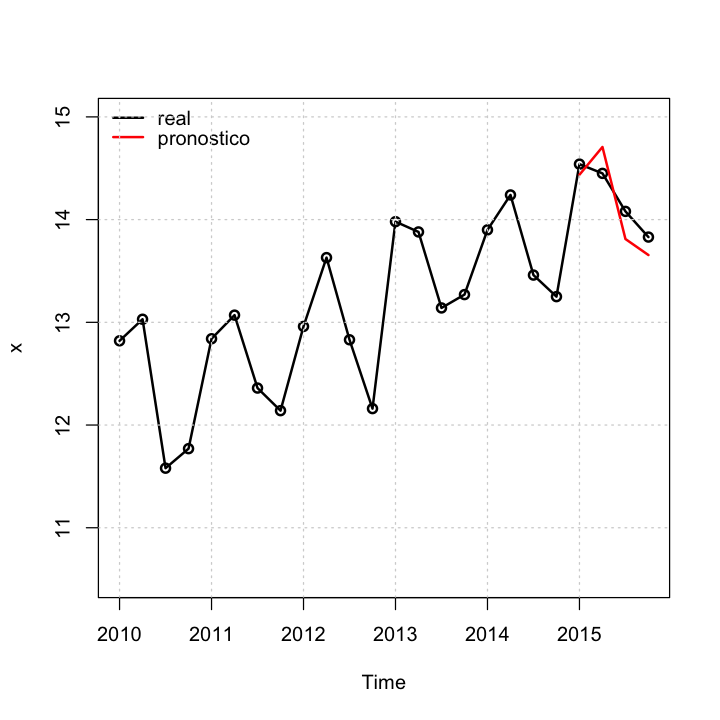

In [17]:
options(repr.plot.width=6, repr.plot.height=6)
plot( x, type='o', lwd=2, ylim=c(10.5, 15.0))
lines(y.pred, col='red',lwd=2)
legend( "topleft",             
        c("real","pronostico"),
        lwd = c(2, 2),         
        col = c('black','red'), 
        bty = "n") 
grid()

In [18]:
## Medidas de precisión
print(accuracy(x.for,y.pred))   

              ME      RMSE   MAE        MPE     MAPE       ACF1 Theil's U
Test set -0.0725 0.2119222 0.201 -0.5488205 1.422554 -0.3445694 0.4402722


**Ejercicio.--** La componente estacional también puede represntarse como:

$$S_t =\beta * \cos (2\pi f t + \Phi)$$


Para el ejercicio anterior, reemplace las variables dummy por esta componente, estime el modelo y realice el pronóstico.

# Intervenciones -- Cambio de nivel

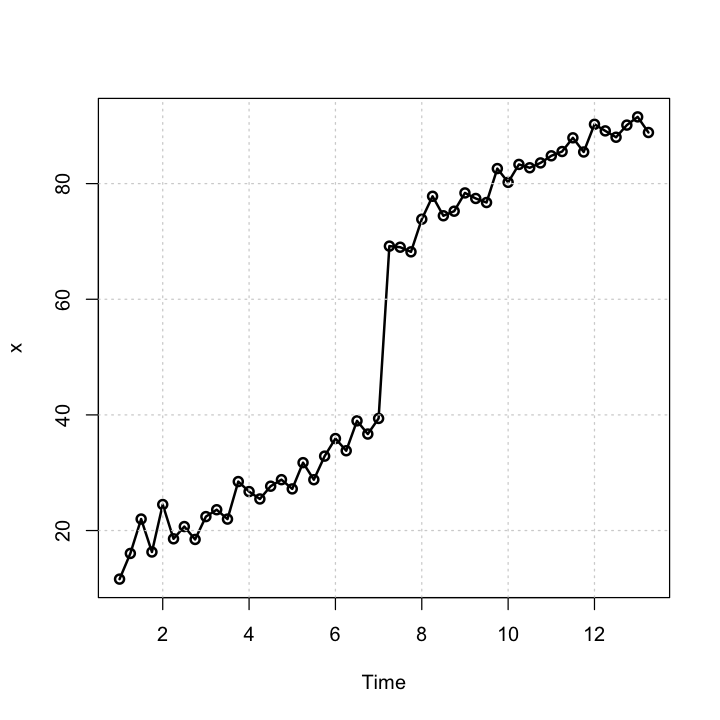

In [19]:
options(repr.plot.width=6, repr.plot.height=6)

x <- c( 11.60, 16.04, 21.99, 16.29,
        24.50, 18.57, 20.69, 18.46,
        22.41, 23.60, 21.98, 28.47,
        26.74, 25.46, 27.67, 28.80,
        27.20, 31.74, 28.79, 32.87,
        35.91, 33.80, 38.97, 36.69,
        39.39, 69.19, 69.00, 68.20,
        73.84, 77.81, 74.44, 75.23,
        78.39, 77.43, 76.73, 82.60,
        80.22, 83.32, 82.74, 83.58,
        84.81, 85.55, 87.92, 85.47,
        90.26, 89.12, 88.02, 90.12,
        91.54, 88.84  )
x <- ts(x, frequency = 4)
plot(x, type="o", lwd=2)
grid()

### Modelo

In [20]:
# se introduce una variable dummy que vale 0 hasta antes 
# del cambio y luego vale 1

t  <- 1:length(x)          
t0 <- 26                   
d  <- rep(0, length(x)) # variable dummy      
d[t0:length(x)] <- 1       
m <- lm(x ~ t + d)
m


Call:
lm(formula = x ~ t + d)

Coefficients:
(Intercept)            t            d  
    14.1472       0.9383      31.5719  


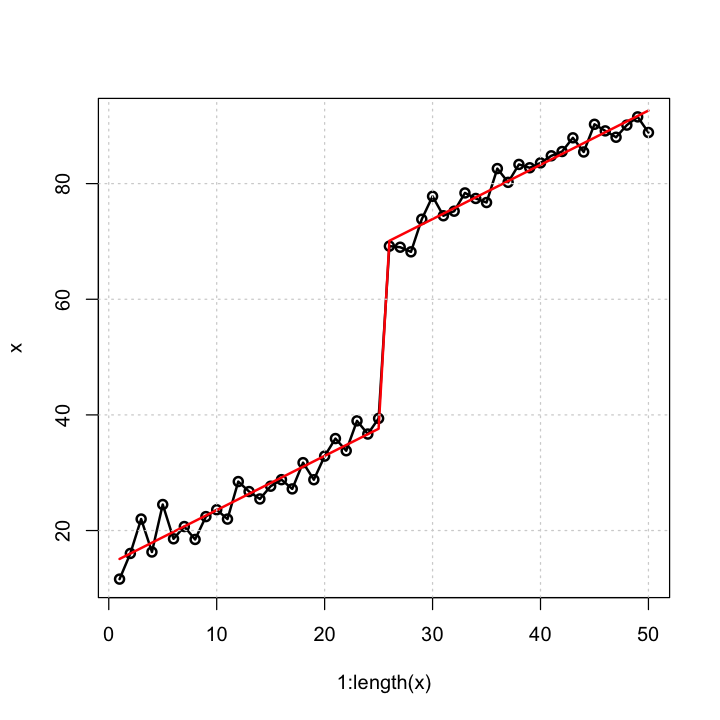

In [21]:
plot(1:length(x), x, type="o", lwd=2)         
lines(1:length(x), m$fitted.values, lwd=2, col="red")
grid()

# Intervenciones -- cambio de pendiente

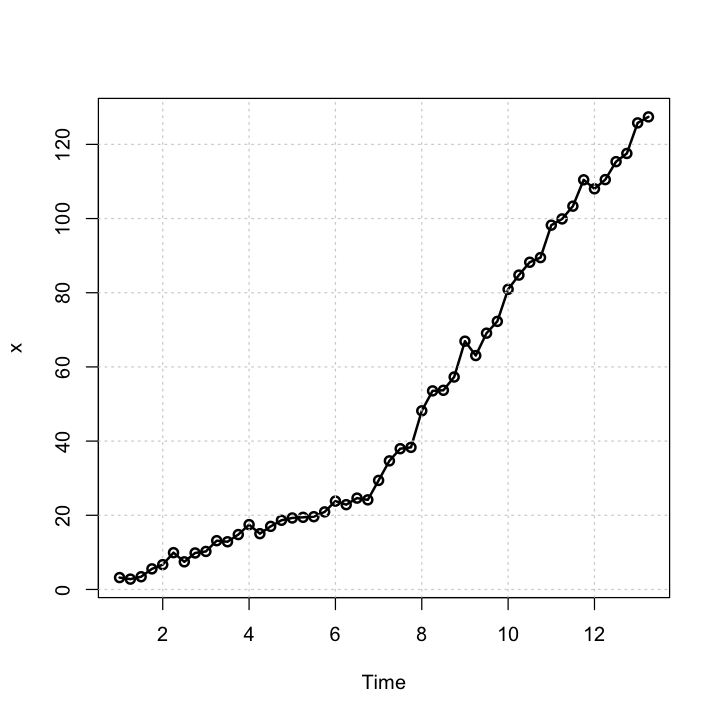

In [22]:
x <- c(  3.20,   2.79,   3.43,   5.55,
         6.69,   9.92,   7.45,   9.84,
        10.25,  13.15,  12.86,  14.80,
        17.48,  15.04,  17.01,  18.65,
        19.27,  19.45,  19.62,  20.91,
        23.82,  22.86,  24.63,  24.16,
        29.40,  34.67,  37.95,  38.31,
        48.16,  53.54,  53.70,  57.28,
        66.94,  63.06,  69.10,  72.28,
        80.93,  84.76,  88.22,  89.48,
        98.22,  99.90, 103.34, 110.44,
       108.02, 110.50, 115.34, 117.55,
       125.79, 127.41)
x <- ts(x,frequency = 4)
plot(x, type="o", lwd=2)
grid()

### Modelo

In [23]:
## Se agrega una variable dummy que vale 0
## hasta el cambio de pendiente y luego 1, 2, 3...
t  <- 1:length(x)
t0 <- 26                                    # Punto de cambio de la serie
d  <- rep(0, length(x))                     # Genereación de variables Dummy's en cero
d[t0:length(x)] <- 1:(length(x) - t0 + 1)   # Secuencia para modelar cambio
m <- lm(x ~ t + d)                          # Modelo de regresión con variable dummy para cambio 
m


Call:
lm(formula = x ~ t + d)

Coefficients:
(Intercept)            t            d  
     0.6855       1.1337       2.9149  


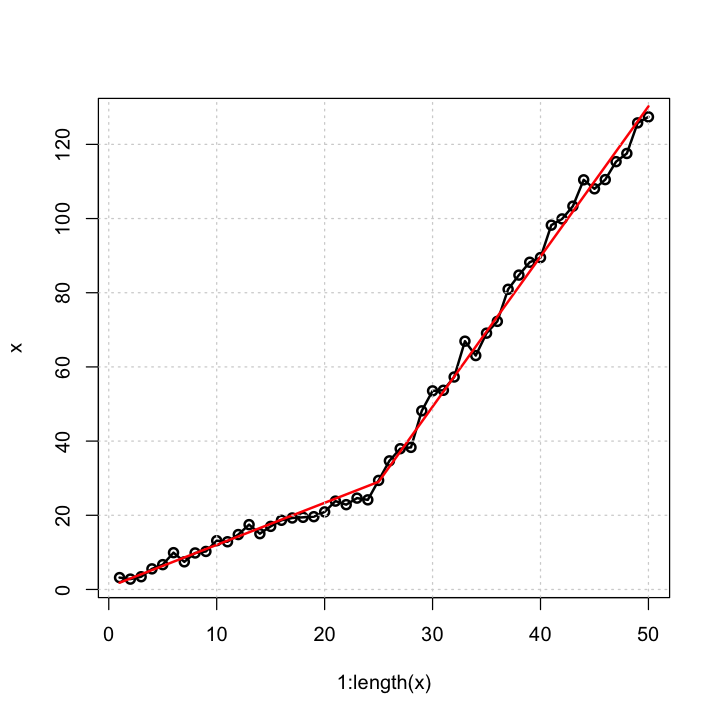

In [24]:
plot(1:length(x), x, type="o", lwd=2)         
lines(1:length(x), m$fitted.values, lwd=2, col="red")
grid()

# Intervenciones -- datos atípicos (outliers)

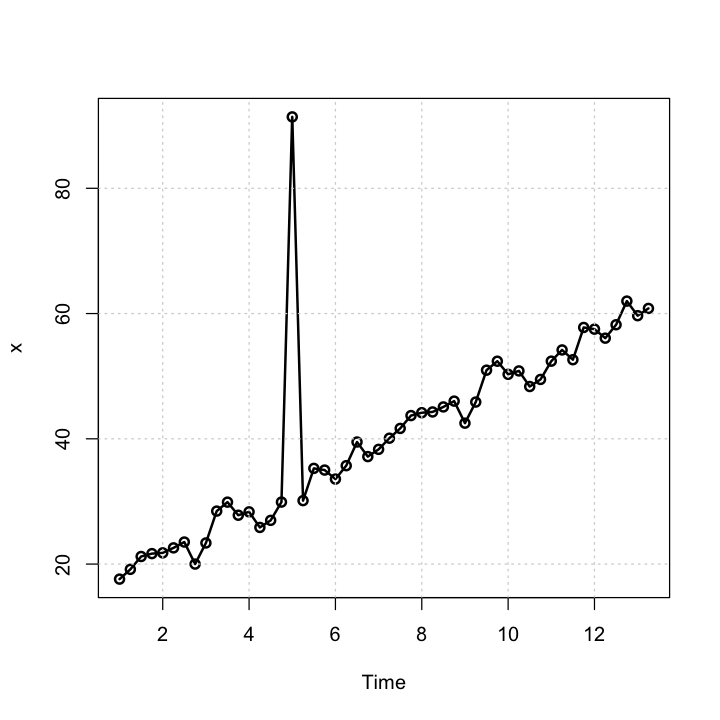

In [25]:
x <- c( 17.60, 19.16, 21.21, 21.67,
        21.79, 22.59, 23.52, 20.00,
        23.37, 28.46, 29.89, 27.80,
        28.34, 25.85, 26.98, 29.90,
        91.40, 30.13, 35.28, 35.01,
        33.57, 35.71, 39.49, 37.16,
        38.32, 40.10, 41.66, 43.71,
        44.17, 44.29, 45.09, 46.02,
        42.50, 45.87, 50.96, 52.39,
        50.30, 50.84, 48.35, 49.48,
        52.40, 54.19, 52.63, 57.78,
        57.51, 56.07, 58.21, 61.99,
        59.66, 60.82 )
x <- ts(x, frequency = 4)
plot(x, type="o", lwd=2)
grid()

### Modelo

In [26]:
## variable dummy que vale 0 durante todo el tiempo
## y 1 en el outlier
t  <- 1:length(x) 
t0 <- 17                 # Punto de cambio de la serie
d  <- rep(0,length(x))   # Genereación de variables Dummy's en cero
d[t0] <- 1               # 1 en adelante cuando cuando de nivel
m <- lm(x ~ t + d)       # Modelo de regresión con variable dummy para cambio  
m


Call:
lm(formula = x ~ t + d)

Coefficients:
(Intercept)            t            d  
    16.8905       0.8841      59.4804  


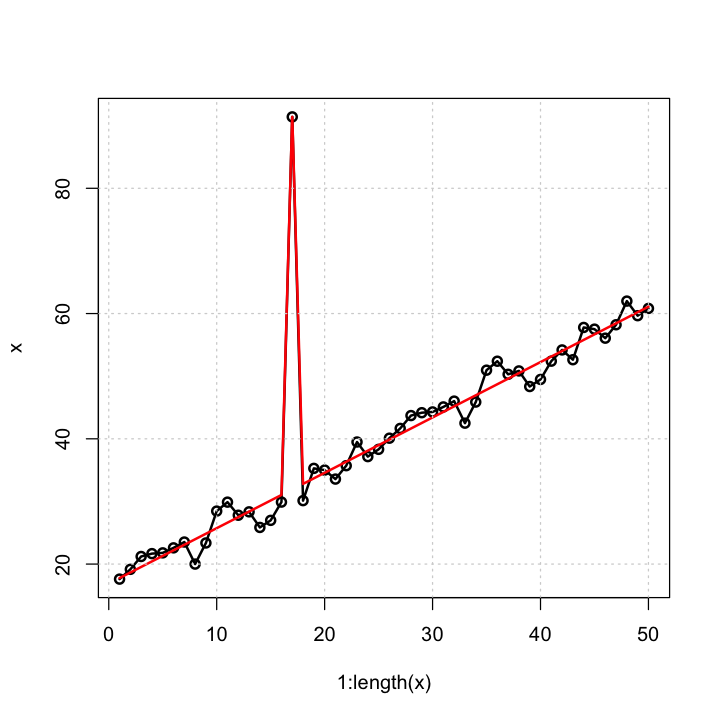

In [27]:
plot(1:length(x), x, type="o", lwd=2)         
lines(1:length(x), m$fitted.values, lwd=2, col="red")
grid()

**Ejercicio.--**Determine que tipo de intervención presenta la siguiente serie de tiempo y ajuste un modelo de regresión.

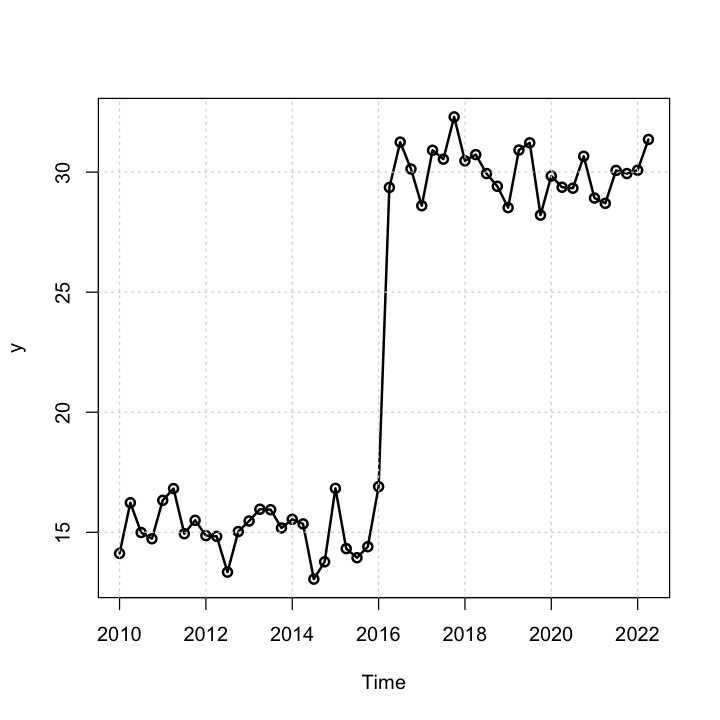

In [28]:
y <- ts(data=c(14.12, 16.23, 14.99, 14.73,
                16.33, 16.82, 14.94, 15.50,
                14.86, 14.83, 13.34, 15.03,
                15.47, 15.96, 15.94, 15.18,
                15.54, 15.35, 13.05, 13.77,
                16.83, 14.32, 13.94, 14.40,
                16.90, 29.36, 31.25, 30.13,
                28.60, 30.91, 30.54, 32.30,
                30.47, 30.73, 29.94, 29.41,
                28.52, 30.92, 31.22, 28.21,
                29.84, 29.37, 29.33, 30.66,
                28.92, 28.70, 30.07, 29.94,
                30.08, 31.36),
         freq = 4,
         start = c(2010,01))
plot(y, type="o", lwd=2)
grid()

Pronóstico con regresión
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/series-de-tiempo/blob/master/07-R-regresion.ipynb) para acceder a la última versión online

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/series-de-tiempo/blob/master/07-R-regresion.ipynb) para ver la última versión online en `nbviewer`. 

---